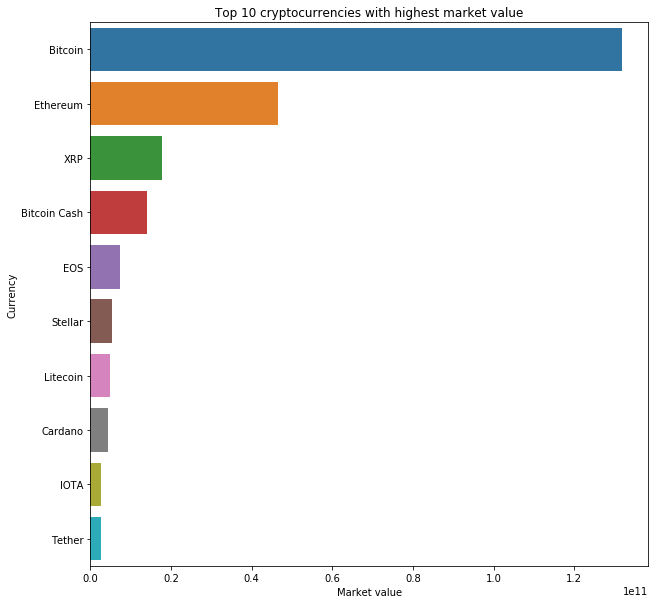

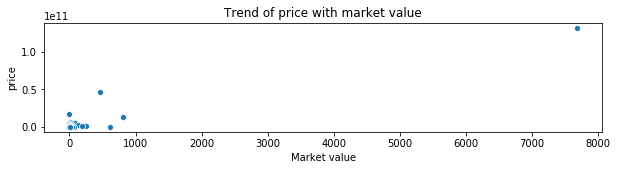

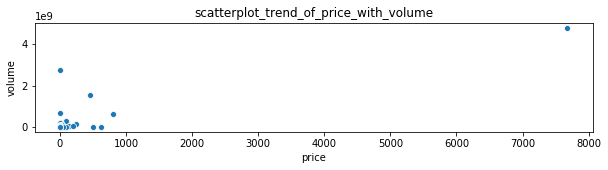

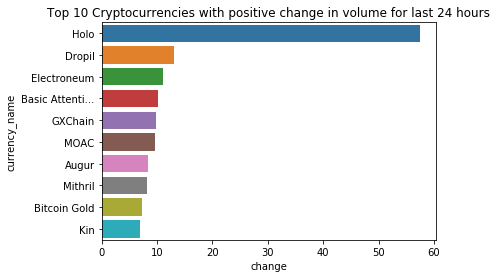

In [7]:
###                Hackathon for Machine Learning Engineer Program
###        Web Scrapping, Data Cleaning & Exploratory Analysis with Python

# In this challenge you will be scrapping the data related to cryptocurrencies,
# perform necessary data cleaning and build few visualization plots.

# NOTE: Use this link 'https://coinmarketcap.com/' as a reference to understand
# the page structure of html page used in this exercise. Both are similar.
# This reference is required for identifying required html tags for parsing the
# given web page and extracting the needed information

# Please complete the definition of following 9 functions, inorder to complete the exercise:
# 1. parse_html_page,
# 2. get_all_tr_elements,
# 3. convert_tr_elements_to_cryptodf,
# 4. transform_cryptodf,
# 5. draw_barplot_top10_cryptocurrencies_with_highest_market_value,
# 6. draw_scatterplot_trend_of_price_with_market_value
# 7. draw_scatterplot_trend_of_price_with_volum
# 8. draw_barplot_top10_cryptocurrencies_with_highest_positive_change
# 9. serialize_plot

# The above nine functions are used in 'main' function.
# The 'main' function parses an input html page, converts required info into pandas datarame,
# and draws two barplots and two scatter plots.

# Please look into definition of 'main' function, to understand inputs and exepcted outputs from above listed 9 functions.
# Also read the documention provided in each function to understand it's functionality.

## Importing python libraries, necessary for solving this exercise.

import pickle
import matplotlib.pyplot as plt
from requests import get
# from urllib.requests import urlopen
from bs4 import BeautifulSoup
import pandas as pd

import seaborn as sns
import numpy as np
import re



def parse_html_page(htmlpage):
    '''
    Parses the input 'htmlpage' using Beautiful Soup html parser and returns it.
    '''
    with open(htmlpage,"rb") as f:
        soup=BeautifulSoup(f.read())
    return soup
    # write the functionality of 'parse_html_page' below.

def get_all_tr_elements(soup_obj):
    '''
    Identifies all 'tr' elements, present in beautiful soup object, 'soup_obj', and returns them
    '''
    table=soup_obj.find("table",class_="table floating-header dataTable no-footer")

    tr=table.findAll("tr")
    tr=tr[1:]
    return tr
    # write your functionality below


def convert_tr_elements_to_cryptodf(htmltable_rows):
    '''
    Extracts the text associated with seven columns of all records present in 'htmltable_rows' object.
    Builds a pandas dataframe and returns it.

    NOTE: Information in seven columns have to be stored in below initilaized lists.
    '''
    rank = []                    #List for rank of the currency (first column in the webpage)
    currency_name = []           #List for name of the currency
    market_cap = []              #List for market cap
    price = []                   #List for price of the crypto currency
    volume = []                  #List for Volume(24h)
    supply = []                  #List for Circulating supply
    change = []                  #List for Change(24h)
    
    for row in htmltable_rows:
        td=row.findAll("td")
        rank.append(td[0].text)  
        currency_name.append(td[1].text.split("\n")[4])
        market_cap.append(td[2].text)
        price.append(td[3].text)
        volume.append(td[4].text)
        supply.append(td[5].span.text)
        change.append(td[6].text)
    # write your functionality below
    

    # Creating the pandas dataframe
    df = pd.DataFrame({
                         'rank' : rank,
                         'currency_name' : currency_name,
                         'market_cap' : market_cap,
                         'price' : price,
                         'volume' : volume,
                         'supply' : supply,
                         'change' : change
                         })

    # Returning the data frame.
    return df


def transform_cryptodf(cryptodf):
    '''
    Returns a modified dataframe.
    '''
    rank = cryptodf["rank"]                    #List for rank of the currency (first column in the webpage)
    currency_name = cryptodf["currency_name"]           #List for name of the currency
    market_cap = cryptodf["market_cap"]              #List for market cap
    price = cryptodf["price"]                   #List for price of the crypto currency
    volume = cryptodf["volume"]                  #List for Volume(24h)
    supply = cryptodf["supply"]                  #List for Circulating supply
    change = cryptodf["change"] 
    
    
    
    cryptodf["rank"]=[s.replace("\n","") for s in cryptodf["rank"]]
    cryptodf["rank"]=[int(s) for s in cryptodf["rank"]]
    cryptodf["market_cap"]=[s.replace("\n","") for s in cryptodf["market_cap"]]
    cryptodf["market_cap"]=[s.replace("$","") for s in cryptodf["market_cap"]]
    cryptodf["market_cap"]=[s.replace(",","") for s in cryptodf["market_cap"]]
    cryptodf["market_cap"]=[int(s) for s in cryptodf["market_cap"]]
    cryptodf["price"]=[s.replace("\n","") for s in cryptodf["price"]]
    cryptodf["price"]=[s.replace("$","") for s in cryptodf["price"]]
    cryptodf["price"]=[s.replace(",","") for s in cryptodf["price"]]
    cryptodf["price"]=[float(s) for s in cryptodf["price"]]
    cryptodf["volume"]=[s.replace("\n","") for s in cryptodf["volume"]]
    cryptodf["volume"]=[s.replace("$","") for s in cryptodf["volume"]]
    cryptodf["volume"]=[s.replace(",","") for s in cryptodf["volume"]]
    cryptodf["volume"]=[int(s) for s in cryptodf["volume"]]
    cryptodf["supply"]=[s.replace(",","") for s in cryptodf["supply"]]
    cryptodf["supply"]=[int(s) for s in cryptodf["supply"]]
    cryptodf["change"]=[s.replace("%","") for s in cryptodf["change"]]
    cryptodf["change"]=[float(s) for s in cryptodf["change"]]
    # Modify values of the columns : 'market_cap', 'price', 'volume', 'change', 'supply'.
    # Remove unwanted characters like dollar symbol ($), comma symbol (,) and
    # convert them into corresponding data type ie. int or float.

    # NOTE : After transformation, the first five rows of the transformed dataframe should be
    #       similar to data in 'expected_transformed_df.csv' file, present in project folder.

    # write your functionality below
    return cryptodf

def draw_barplot_top10_cryptocurrencies_with_highest_market_value(cryptocur_df):
    '''
    Returns barplot
    '''
    dfm=cryptocur_df.copy()
    dfm.sort_values("market_cap",ascending=False,inplace=True)
    mc=dfm["market_cap"][:10]
    names=dfm["currency_name"][:10]

    fig,ax=plt.subplots(figsize=(10,10))
    sns.barplot(mc,names)
    plt.title("Top 10 cryptocurrencies with highest market value")
    plt.ylabel("Currency")
    plt.xlabel("Market value")
    return fig

    # Create a horizontal bar plot using seaborn showing
    # Top 10 Cryptocurrencies with highest Market Capital.
    # Order the cryptocurrencies in Descending order. i.e
    # bar corresponding to cryptocurrency with highest market value must be on top of bar plot.

    # Write the functionality below


def draw_scatterplot_trend_of_price_with_market_value(cryptocur_df):
    '''
    Returns a scatter plot
    '''
    dfm=cryptocur_df.copy()
    dfm.sort_values("market_cap",ascending=False,inplace=True)
    mc=dfm["market_cap"][:50]
    price=dfm["price"][:50]
    fig,ax=plt.subplots(figsize=(10,2))
    sns.scatterplot(price,mc)
    plt.title("Trend of price with market value")
    plt.ylabel("price")
    plt.xlabel("Market value")
    return fig
    # Create a scatter plot, using seaborn, showing trend of Price with Market Capital.
    # Consider 50 Cryptocurrencies, with higest Market Value for seeing the trend.
    # Set the plot size to 10 inches in width and 2 inches in height respectively.

    # Write the functionality below


def draw_scatterplot_trend_of_price_with_volume(cryptocur_df):
    '''
    Returns a scatter plot
    '''
    fig,ax=plt.subplots(figsize=(10,2))
    sns.scatterplot("price","volume",data=cryptocur_df)
    plt.title("scatterplot_trend_of_price_with_volume")
    return fig
    # Create a scatter plot, using seaborn, showing trend of Price with 24 hours Volume.
    # Consider all 100 Cryptocurrencies for seeing the trend.
    # Set the plot size to 10 inches in width and 2 inches in height respectively.

    # Write the functionality below



def draw_barplot_top10_cryptocurrencies_with_highest_positive_change(cryptocur_df):
    '''
    Returns a bar plot
    '''
    dfm=cryptocur_df.copy()
    dfm.sort_values("change",ascending=False,inplace=True)
    change=dfm["change"][:10]
    name=dfm["currency_name"][:10]
    fig,ax=plt.subplots()
    sns.barplot(change,name)
    plt.title("Top 10 Cryptocurrencies with positive change in volume for last 24 hours")
    return fig
    # Create a horizontal bar plot using seaborn showing
    # Top 10 Cryptocurrencies with positive change in last 24 hours.
    # Order the cryptocurrencies in Descending order. i.e
    # bar corresponding to cryptocurrency with highest positive change must be on top of bar plot.

    # Write the functionality below


def serialize_plot(plot, plot_dump_file):
    '''
    Dumps the 'plot' object in to 'plot_dump_file' using pickle.
    '''
    pickle.dump(plot, open(plot_dump_file, 'wb'))

    # Write the functionality below


def main():

    input_html = 'file:data/input_html/Cryptocurrency Market Capitalizations _ CoinMarketCap.html'


    html_soup = parse_html_page(input_html)

    crypto_containers = get_all_tr_elements(html_soup)

    crypto_df = convert_tr_elements_to_cryptodf(crypto_containers)

    crypto_df = transform_cryptodf(crypto_df)

    plot1 = draw_barplot_top10_cryptocurrencies_with_highest_market_value(crypto_df)

    plot2 = draw_scatterplot_trend_of_price_with_market_value(crypto_df)

    plot3 = draw_scatterplot_trend_of_price_with_volume(crypto_df)

    plot4 = draw_barplot_top10_cryptocurrencies_with_highest_positive_change(crypto_df)

    serialize_plot(plot1, "plot1.pk")

    serialize_plot(plot2.axes, "plot2_axes.pk")

#     serialize_plot(plot2.data, "plot2_data.pk")

    serialize_plot(plot3.axes, "plot3_axes.pk")

#     serialize_plot(plot3.data, "plot3_data.pk")

    serialize_plot(plot4, "plot4.pk")


if __name__ == '__main__':
    main()
